# i - Query SQL
> Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0
```

# ii - Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya** berisi semua *library* yang digunakan dalam project.

In [1]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np


# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Buat definisi model
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score

# Buat import hasil model saving
import joblib

# iii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df_ori = pd.read_csv ("Credit Card Information.csv")
df = df_ori.copy()
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [3]:
# Menampilkan 10 data pertama
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [4]:
# Menampilkan 10 data terakhir
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Penjelasan tiap kolom:

| Kolom      | data_type | Penjelasan |
| :-----------: | :-----------: | ----------- |
|`CUST_ID`| INT64 | Identification of Credit Card holder |
|`BALANCE` | FLOAT64 | Balance amount left in their account to make purchases |
|`BALANCE_FREQUENCY` | FLOAT64 | How frequently the Balance is updated (1 = Frequently updated, 0 = Not frequently updated) |
|`PURCHASES` | FLOAT64 | Amount of purchases made from account |
|`ONEOFF_PURCHASES` | FLOAT64 | Maximum purchase amount done in on-ego |
|`INSTALLMENTS_PURCHASES` | FLOAT64 | Amount of purchase done in installment |
|`CASH_ADVANCE` | FLOAT64 | Cash in advance given by the user |
|`PURCHASES_FREQUENCY` | FLOAT64 | How frequently the purchases are being made (1 = frequently purchased, 0 = not frequently purchased) |
|`ONEOFF_PURCHASES_FREQUENCY` | FLOAT64 | How frequently purchases are happening in one-go (1 = frequently done, 0 = not frequently done) |
|`PURCHASES_INSTALLMENTS_FREQUENCY` | FLOAT64 | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
|`CASH_ADVANCE_FREQUENCY` | FLOAT64 | How frequently the cash in advance being paid |
|`CASH_ADVANCE_TRX` | INT64 | Number of Transactions made with 'Cash in Advanced' |
|`PURCHASES_TRX` | INT64 | Number of purchase transactions made |
|`CREDIT_LIMIT` | FLOAT64 | Limit of Credit Card for user |
|`PAYMENTS` | FLOAT64 | Amout of Payment done by user |
|`MINIMUM_PAYMENTS` | FLOAT64 | Minimum amount of payments made by user |
|`PRC_FULL_PAYMENT` | FLOAT64 | Percent of full payment paid by user |
|`TENURE` | INT64 | Tenure of credit card service for user |

# iv - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Korelasi antar kolom

<Axes: >

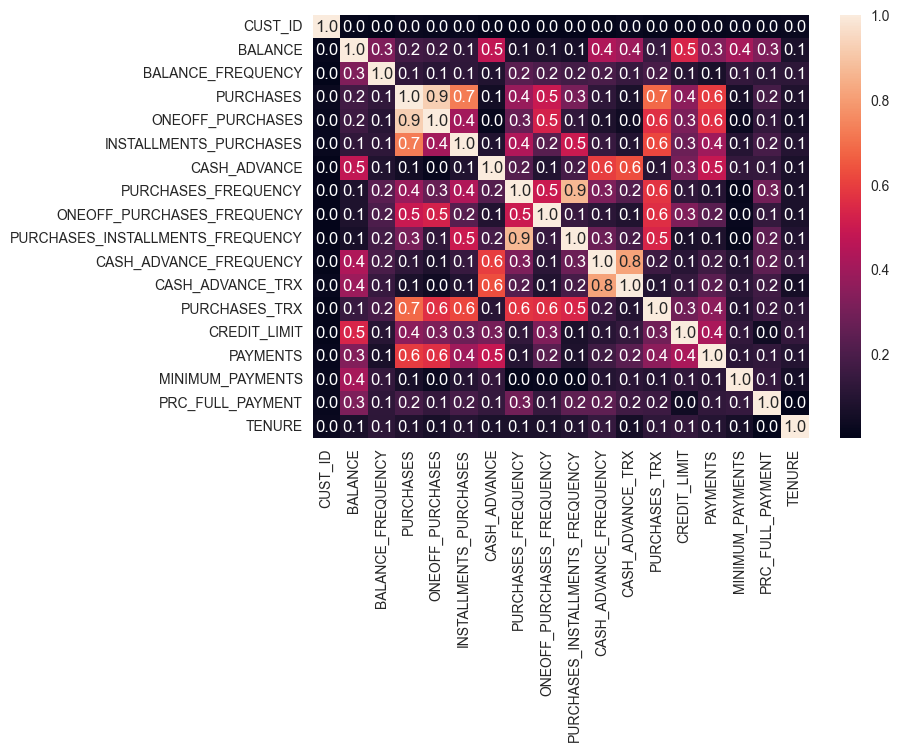

In [6]:
sns.heatmap(df.corr().abs(), annot=True, fmt=".1f")

## Melihat data statistik pada data frame

In [7]:
df.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

## Perbandingan data 

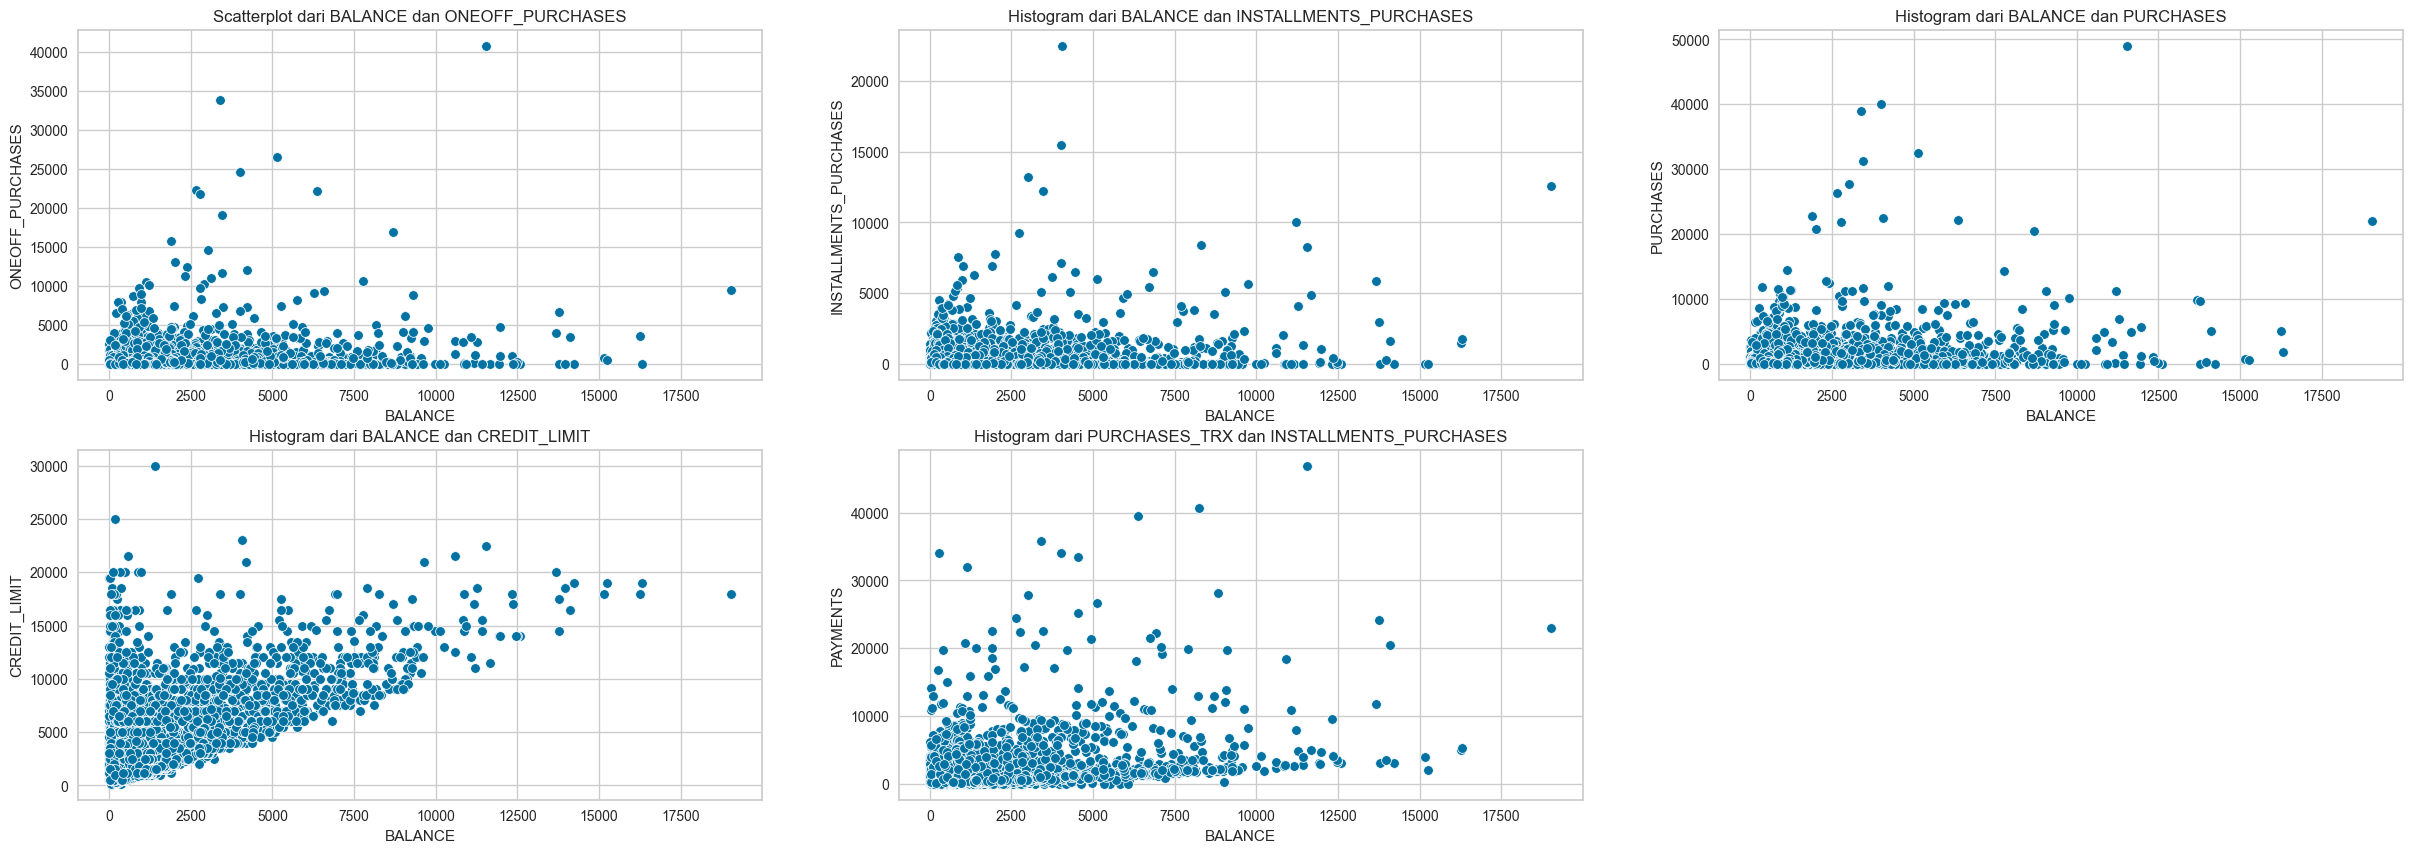

In [8]:
plt.figure(figsize=(30, 10))
plt.suptitle ('')

ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='BALANCE', y='ONEOFF_PURCHASES')
ax1 = plt.title('Scatterplot dari BALANCE dan ONEOFF_PURCHASES')

ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='BALANCE', y='INSTALLMENTS_PURCHASES')
ax2 = plt.title('Histogram dari BALANCE dan INSTALLMENTS_PURCHASES')

ax3 = plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')
ax3 = plt.title('Histogram dari BALANCE dan PURCHASES')

ax4 = plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT')
ax4 = plt.title('Histogram dari BALANCE dan CREDIT_LIMIT')

ax5 = plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS')
ax5 = plt.title('Histogram dari PURCHASES_TRX dan INSTALLMENTS_PURCHASES')


# v - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Membuang kolom yang tidak berkorelasi

Pada EDA, kolom `CUST_ID` tidak berkorelasi dengan kolom lainnya, sehingga lebih baik di drop dan `ONEOFF_PURCHASES` dan `INSTALLMENTS_PURCHASES`didrop karena angkanya merupakan formula dari `PURCHASES` +  sehingga artinya duplicate, untuk Frequency juga dihilangkan

In [9]:
df.drop(['CUST_ID', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  CASH_ADVANCE  \
0       16.581535           0.125000     200.00      0.000000   
1      943.584041           0.875000     103.00      0.000000   
2        1.979916           0.125000      80.00      0.000000   
3      461.455720           1.000000     585.00      0.000000   
4     1053.594730           1.000000    1450.00      0.000000   
...           ...                ...        ...           ...   
4470  1079.008102           1.000000       0.00   1259.571764   
4471   809.582978           0.909091       0.00   3819.672466   
4472  3386.490883           1.000000     560.98   2008.153534   
4473  4840.545574           1.000000    1595.93   4359.325750   
4474  1977.007090           1.000000    1032.04   4335.919227   

      PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                0.125000                0.000000                 0   
1                0.125000                0.000000                 0   
2                0.125000                0.000000                 0   
3                0.125000                0.000000                 0   
4                0.125000                0.000000                 0   
...                   ...                     ...               ...   
4470             0.000000                0.545455                 9   
4471             0.000000                0.545455                 7   
4472             1.000000                0.545455                 9   
4473             0.454545                0.545455                17   
4474             0.909091                0.545455                21   

      PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                 2        1200.0     0.000000               NaN   
1                 1        1000.0   215.325023        410.484825   
2                 1        1500.0     0.000000               NaN   
3                 1        1000.0   258.032630        151.696433   
4                 1        1500.0   397.090516        227.143184   
...             ...           ...          ...               ...   
4470              0        1200.0  1379.635287        271.364415   
4471              0        4150.0  4372.148648        241.645387   
4472             20       10100.0  1039.000037        886.050237   
4473             25        6000.0   905.844846       2376.919568   
4474             17        4000.0  3056.424974        910.707525   

      PRC_FULL_PAYMENT  TENURE  
0             0.000000       8  
1             0.000000       8  
2             0.000000       8  
3             0.000000       8  
4             0.000000       8  
...                ...     ...  
4470          0.090909      11  
4471          0.090909      11  
4472          0.000000      11  
4473          0.090909      11  
4474          0.090909      11  

[4475 rows x 13 columns]

## Handle Missing Values

In [10]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # Jumlah data yang hilang pada kolom
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Jumlah persen data yang hilang
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # digabung menjadi tabel
    return missing_data

missing_check(df)

Total   Percent
MINIMUM_PAYMENTS          158  3.530726
CREDIT_LIMIT                1  0.022346
BALANCE                     0  0.000000
BALANCE_FREQUENCY           0  0.000000
PURCHASES                   0  0.000000
CASH_ADVANCE                0  0.000000
PURCHASES_FREQUENCY         0  0.000000
CASH_ADVANCE_FREQUENCY      0  0.000000
CASH_ADVANCE_TRX            0  0.000000
PURCHASES_TRX               0  0.000000
PAYMENTS                    0  0.000000
PRC_FULL_PAYMENT            0  0.000000
TENURE                      0  0.000000

Terlihat data yang hilang berada pada kolom 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS'

Pada 'CREDIT_LIMIT' termasuk MCAR (Missing Completely at Random) karena tidak ada kaitannya dengan kolom lainnya, terlihat pada korelasi antar kolom. Data tersebut hanya hilang 1 maka didrop, logikanya ketika membuat kartu kredit pasti ada limitnya.

Sedangkan pada 'Minimum Payments' juga masa termasuk MCAR. Data yang hilang dibawah 5% yang akan dilakukan analisis selanjutnya akan manipulasi seperti apa.

### 'MINIMUM_PAYMENTS'

Skewness Value MINIMUM_PAYMENTS:  12.36


Text(0.5, 1.0, 'Histogram dari MINIMUM_PAYMENTS')

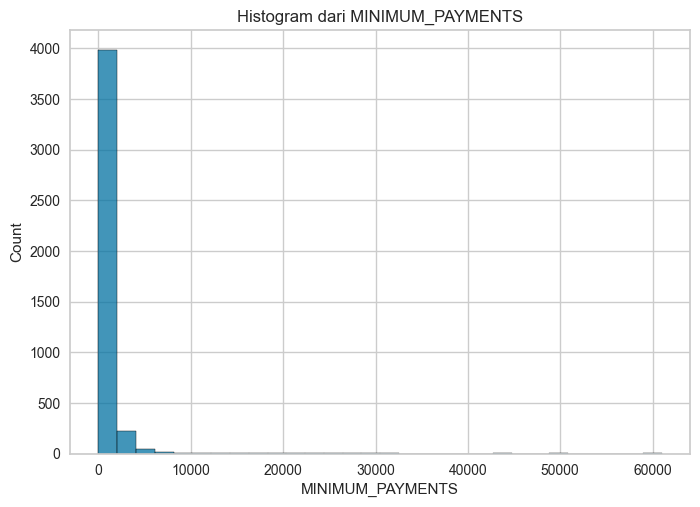

In [11]:
# Melihat nilai skewness pada masing-masing kolom yang hilang datanya
print('Skewness Value MINIMUM_PAYMENTS: ', df['MINIMUM_PAYMENTS'].skew().round(decimals=2))

# Membuat grafik untuk visualisasi skewness
sns.histplot(df['MINIMUM_PAYMENTS'].astype(float), bins=30)
plt.title('Histogram dari MINIMUM_PAYMENTS')


Terlihat data pada kolom 'MINIMUM_PAYMENTS' tersebut terskewed dengan buruk , maka dilakukan Median Imputation

In [12]:
median_MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.median()
df['MINIMUM_PAYMENTS'].fillna(median_MINIMUM_PAYMENTS, inplace=True)

### 'CREDIT_LIMIT'
> Untuk `CREDIT_LIMIT` karena hanya 1 yang missing values, jadi didrop

In [13]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)


### Hasil Handling Missing Values

In [14]:
print('Skewness Value CREDIT_LIMIT sebelum handling: ', df_ori['CREDIT_LIMIT'].skew().round(decimals=2))
print('Skewness Value CREDIT_LIMIT setelah handling: ', df['CREDIT_LIMIT'].skew().round(decimals=2))
print ()
print('Skewness Value MINIMUM_PAYMENTS sebelum handling: ', df_ori['MINIMUM_PAYMENTS'].skew().round(decimals=2))
print('Skewness Value MINIMUM_PAYMENTS setelah handling: ', df['MINIMUM_PAYMENTS'].skew().round(decimals=2))

df.isnull().sum()

Skewness Value CREDIT_LIMIT sebelum handling:  1.55
Skewness Value CREDIT_LIMIT setelah handling:  1.55

Skewness Value MINIMUM_PAYMENTS sebelum handling:  12.36
Skewness Value MINIMUM_PAYMENTS setelah handling:  12.57


BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

Setelah dilakukannya handle missing values, nilai skewness pada CREDIT_LIMIT masih sama, sedangkan pada MINIMUM_PAYMENTS bertambah tetapi tidak banyak sehingga masih bisa digunakan

## Handle Outlier

Melihat nilai skewness pada semua kolom

In [15]:
for i in df.columns:
     print(f"Skewness Value {i}: {df[i].skew().round(decimals=2)}")

Skewness Value BALANCE: 2.46
Skewness Value BALANCE_FREQUENCY: -2.02
Skewness Value PURCHASES: 8.99
Skewness Value CASH_ADVANCE: 4.74
Skewness Value PURCHASES_FREQUENCY: 0.06
Skewness Value CASH_ADVANCE_FREQUENCY: 1.82
Skewness Value CASH_ADVANCE_TRX: 4.75
Skewness Value PURCHASES_TRX: 4.48
Skewness Value CREDIT_LIMIT: 1.55
Skewness Value PAYMENTS: 6.04
Skewness Value MINIMUM_PAYMENTS: 12.57
Skewness Value PRC_FULL_PAYMENT: 1.91
Skewness Value TENURE: -2.94


Menggunakan Winsorizer pada data yang terskew

Pada variasi data yang tinggi digunakan metode IQR, beberapa tidak discaling karena datanya sudah kecil rangenya, seperti pada `BALANCE_FREQUENCY` itu sudah antara 0 dan 1

In [16]:
winsorizer = Winsorizer(capping_method='iqr', 
                            tail='both', 
                            fold=1.5,
                            variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','CASH_ADVANCE',
                                       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'])

df = winsorizer.fit_transform(df)

Melihat skewness setelah dilakukan Winsorizer

In [17]:
for i in df.columns:
     print(f"Skewness Value {i}: {df[i].skew().round(decimals=2)}")

Skewness Value BALANCE: 1.17
Skewness Value BALANCE_FREQUENCY: -1.17
Skewness Value PURCHASES: 1.21
Skewness Value CASH_ADVANCE: 1.26
Skewness Value PURCHASES_FREQUENCY: 0.06
Skewness Value CASH_ADVANCE_FREQUENCY: 1.08
Skewness Value CASH_ADVANCE_TRX: 1.29
Skewness Value PURCHASES_TRX: 1.15
Skewness Value CREDIT_LIMIT: 1.01
Skewness Value PAYMENTS: 1.14
Skewness Value MINIMUM_PAYMENTS: 1.18
Skewness Value PRC_FULL_PAYMENT: 1.91
Skewness Value TENURE: -2.94


## Scaling Data

Menggunakan MinMaxScaler karena datanya tidak terdistribusi secara baik dan nilai skewnya lumayan tinggi

In [18]:
sc=MinMaxScaler()
sc.fit(df)
df_sc=sc.transform(df)

In [19]:
df_sc

array([[3.34825851e-03, 0.00000000e+00, 7.28059694e-02, ...,
        1.79860144e-01, 0.00000000e+00, 3.33333333e-01],
       [1.90535032e-01, 5.49999550e-01, 3.74950742e-02, ...,
        2.38279407e-01, 0.00000000e+00, 3.33333333e-01],
       [3.99798366e-04, 0.00000000e+00, 2.91223877e-02, ...,
        1.79860144e-01, 0.00000000e+00, 3.33333333e-01],
       ...,
       [6.83823718e-01, 1.00000000e+00, 2.04213463e-01, ...,
        5.14362366e-01, 0.00000000e+00, 8.33333333e-01],
       [9.77436522e-01, 1.00000000e+00, 5.80966153e-01, ...,
        1.00000000e+00, 9.09090000e-02, 8.33333333e-01],
       [3.99210978e-01, 1.00000000e+00, 3.75693363e-01, ...,
        5.28676815e-01, 9.09090000e-02, 8.33333333e-01]])

## PCA

In [20]:
pca = PCA()
pca.fit(df_sc)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

Membuat visualisasi untuk mencari nilai K

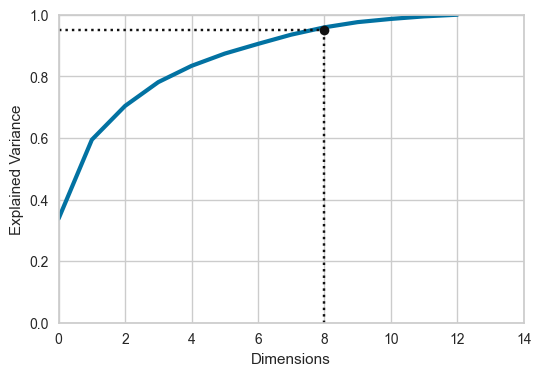

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Berdasarkan grafik diatas, pada nilai K = 8 sudah mencapai nilai total 0.95, sehingga nilai tersebut digunakan untuk nilai `n_components`

In [22]:
pca = PCA(n_components=8, random_state=1509)
pca.fit(df_sc)
df_sc_pca = pca.transform(df_sc)

In [23]:
df_sc_pca_df = pd.DataFrame(df_sc_pca)
df_sc_pca_df

0         1         2         3         4         5         6  \
0    -0.340606 -0.999787  0.193742  0.205949  0.458832  0.025948  0.364087   
1    -0.181668 -0.734372 -0.211872  0.134177  0.229048  0.079763  0.472658   
2    -0.327077 -1.023507  0.186895  0.213510  0.448872  0.048033  0.360416   
3    -0.220988 -0.545692 -0.449973 -0.085737 -0.001998 -0.063091  0.647626   
4    -0.223594 -0.353176 -0.385438  0.011800  0.011969 -0.130144  0.733367   
...        ...       ...       ...       ...       ...       ...       ...   
4469  0.955681 -0.383542 -0.025067 -0.603765 -0.202123 -0.236717  0.043903   
4470  1.116883 -0.243677  0.621629 -0.323151 -0.339999 -0.370331  0.095376   
4471  0.899544  0.723779  0.130225 -0.445182  0.400686  0.273298 -0.061283   
4472  1.326090  0.826745  0.147947 -0.172399  0.372594  0.230122 -0.051635   
4473  0.983480  0.717938  0.404904 -0.662702  0.175783 -0.048219 -0.131531   

             7  
0     0.223454  
1     0.267958  
2     0.202700  
3     0.211133  
4     0.250225  
...        ...  
4469  0.076860  
4470  0.079247  
4471 -0.437502  
4472  0.056527  
4473  0.089841  

[4474 rows x 8 columns]

# vi - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## KMeans

In [24]:
km = KMeans(n_init = 'auto', random_state = 1509)

# vii - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## KMeans

In [25]:
km.fit(df_sc_pca_df)

KMeans(n_init='auto', random_state=1509)

# viii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**



## The Elbow Method

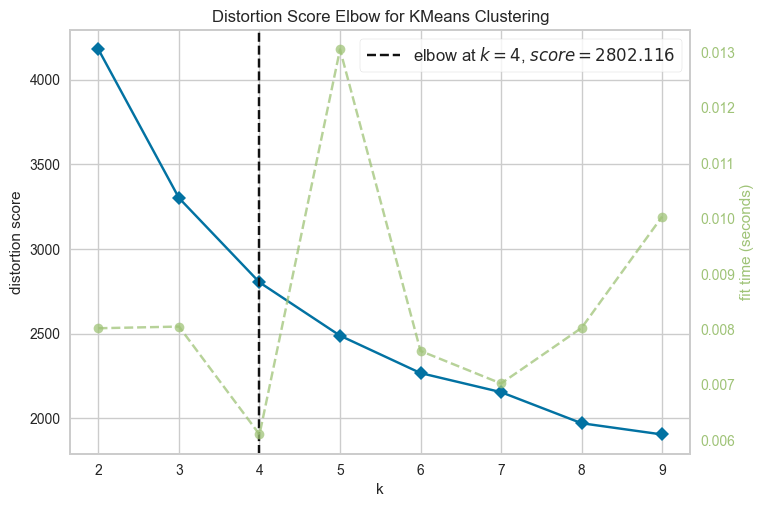

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
Elbow_M = KElbowVisualizer(km, k=9)
Elbow_M.fit(df_sc_pca_df)
Elbow_M.show()

Pada grafik diatas, nilai k adalah 4

## Silhouette Score

In [27]:
#calculate the score
score = silhouette_score(df_sc_pca_df, km.labels_)
print('Score rata-rata silhouette: %.3f' % score)

Score rata-rata silhouette: 0.249


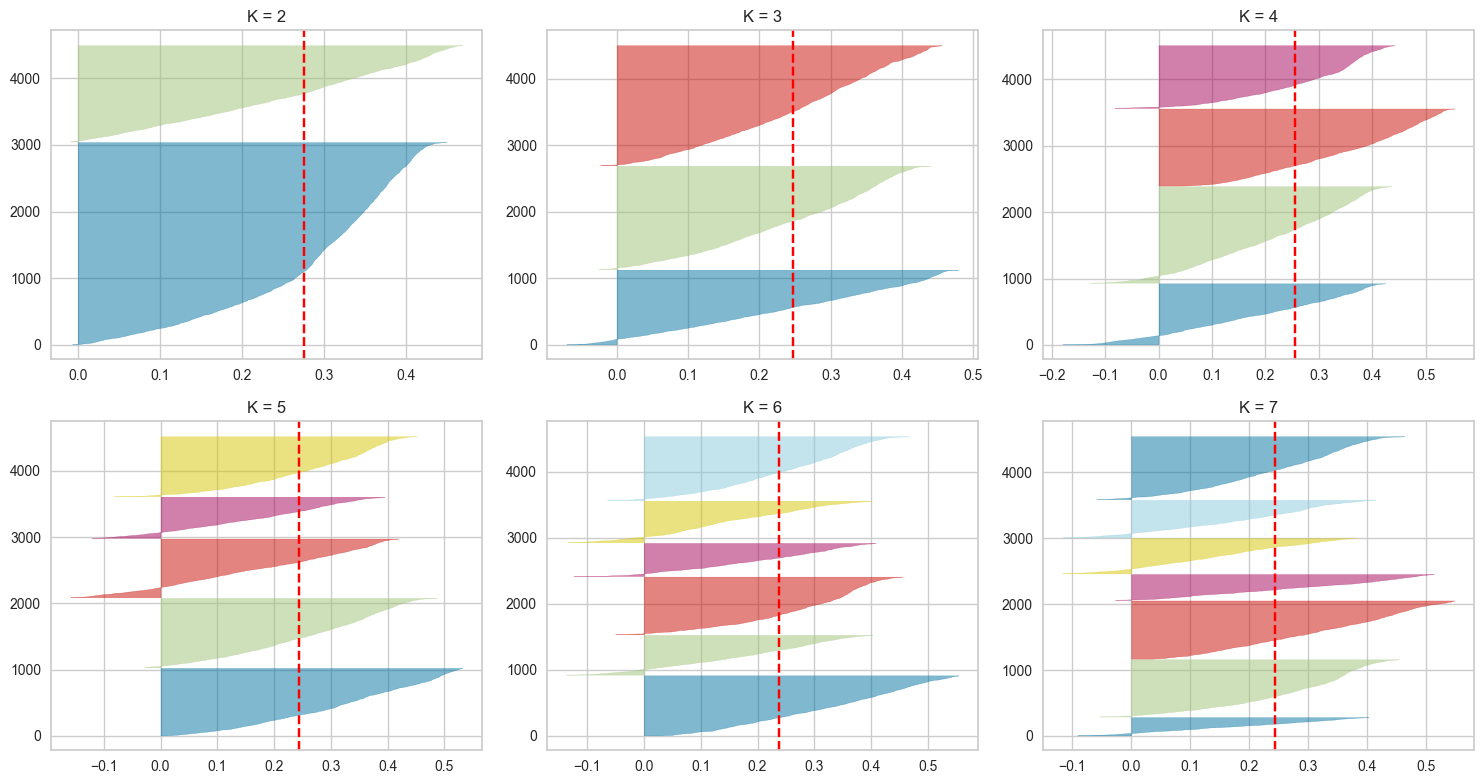

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 1509)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(df_sc_pca_df)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

## Hasil Model Evaluation

In [29]:
km = KMeans(n_clusters = 4, n_init = 'auto', random_state = 1509)
km.fit_predict(df_sc_pca_df)

array([2, 0, 2, ..., 3, 3, 3])

In [30]:
km.n_iter_

7

In [31]:
df_sc_pca_df

0         1         2         3         4         5         6  \
0    -0.340606 -0.999787  0.193742  0.205949  0.458832  0.025948  0.364087   
1    -0.181668 -0.734372 -0.211872  0.134177  0.229048  0.079763  0.472658   
2    -0.327077 -1.023507  0.186895  0.213510  0.448872  0.048033  0.360416   
3    -0.220988 -0.545692 -0.449973 -0.085737 -0.001998 -0.063091  0.647626   
4    -0.223594 -0.353176 -0.385438  0.011800  0.011969 -0.130144  0.733367   
...        ...       ...       ...       ...       ...       ...       ...   
4469  0.955681 -0.383542 -0.025067 -0.603765 -0.202123 -0.236717  0.043903   
4470  1.116883 -0.243677  0.621629 -0.323151 -0.339999 -0.370331  0.095376   
4471  0.899544  0.723779  0.130225 -0.445182  0.400686  0.273298 -0.061283   
4472  1.326090  0.826745  0.147947 -0.172399  0.372594  0.230122 -0.051635   
4473  0.983480  0.717938  0.404904 -0.662702  0.175783 -0.048219 -0.131531   

             7  
0     0.223454  
1     0.267958  
2     0.202700  
3     0.211133  
4     0.250225  
...        ...  
4469  0.076860  
4470  0.079247  
4471 -0.437502  
4472  0.056527  
4473  0.089841  

[4474 rows x 8 columns]

In [32]:
df['Clusters'] = km.labels_
df_sc_pca_df['Clusters'] = km.labels_
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  CASH_ADVANCE  \
0    16.581535           0.722223      200.0           0.0   
1   943.584041           0.875000      103.0           0.0   
2     1.979916           0.722223       80.0           0.0   
3   461.455720           1.000000      585.0           0.0   
4  1053.594730           1.000000     1450.0           0.0   

   PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                0.125                     0.0                 0   
1                0.125                     0.0                 0   
2                0.125                     0.0                 0   
3                0.125                     0.0                 0   
4                0.125                     0.0                 0   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  \
0              2        1200.0    0.000000        309.854995   
1              1        1000.0  215.325023        410.484825   
2              1        1500.0    0.000000        309.854995   
3              1        1000.0  258.032630        151.696433   
4              1        1500.0  397.090516        227.143184   

   PRC_FULL_PAYMENT  TENURE  Clusters  
0               0.0       8         2  
1               0.0       8         0  
2               0.0       8         2  
3               0.0       8         0  
4               0.0       8         0

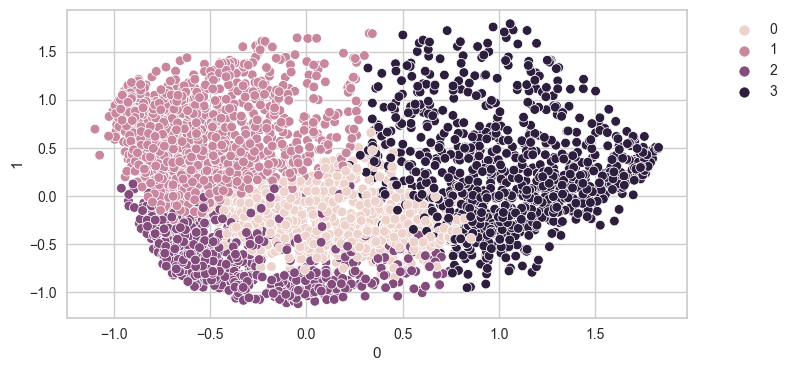

In [33]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_sc_pca_df.iloc[:, 0], y=df_sc_pca_df.iloc[:, 1], hue=df_sc_pca_df['Clusters'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## EDA Hasil Clustering

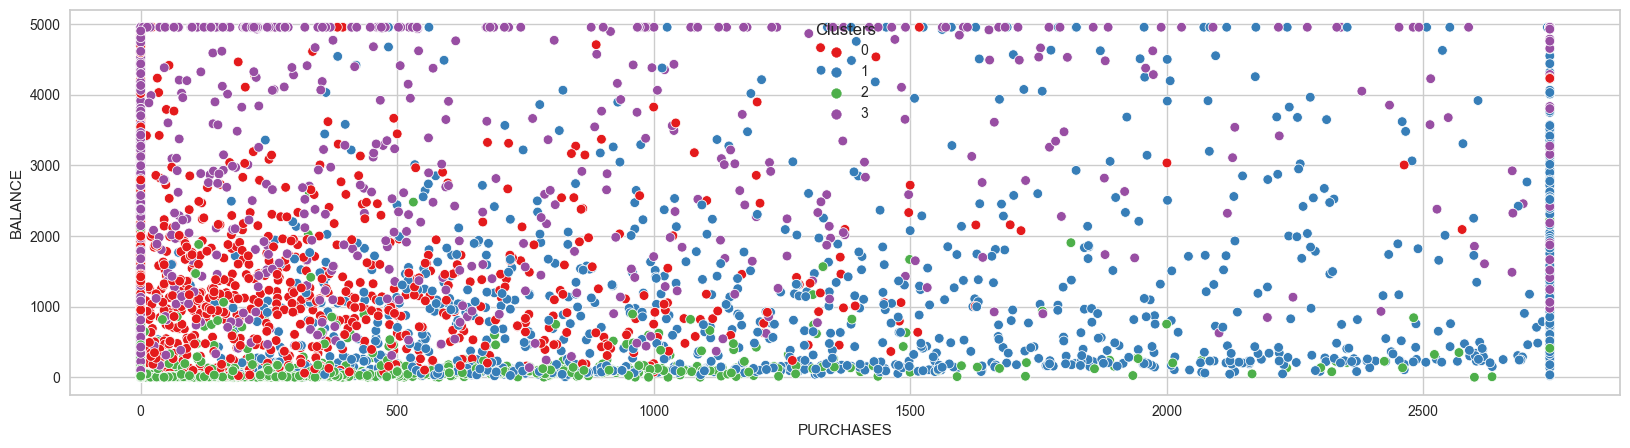

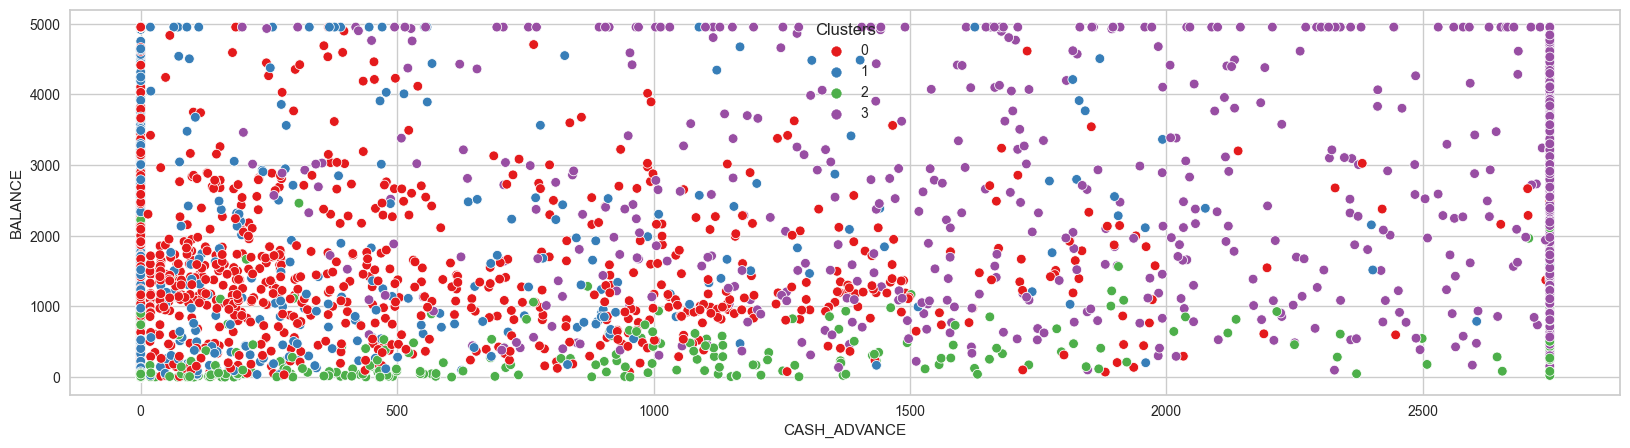

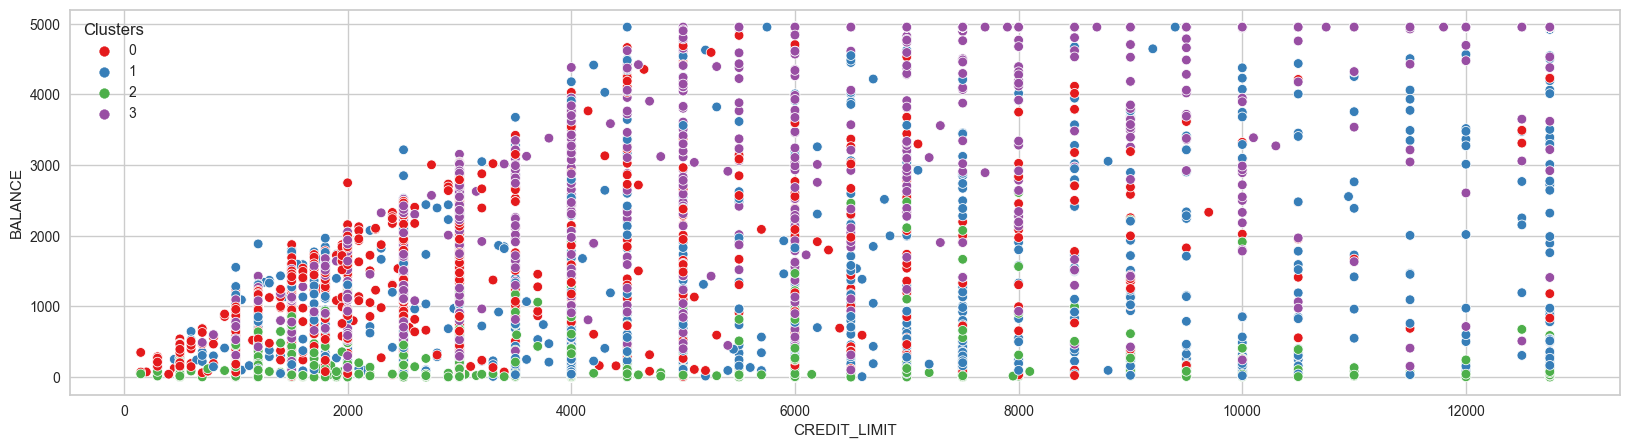

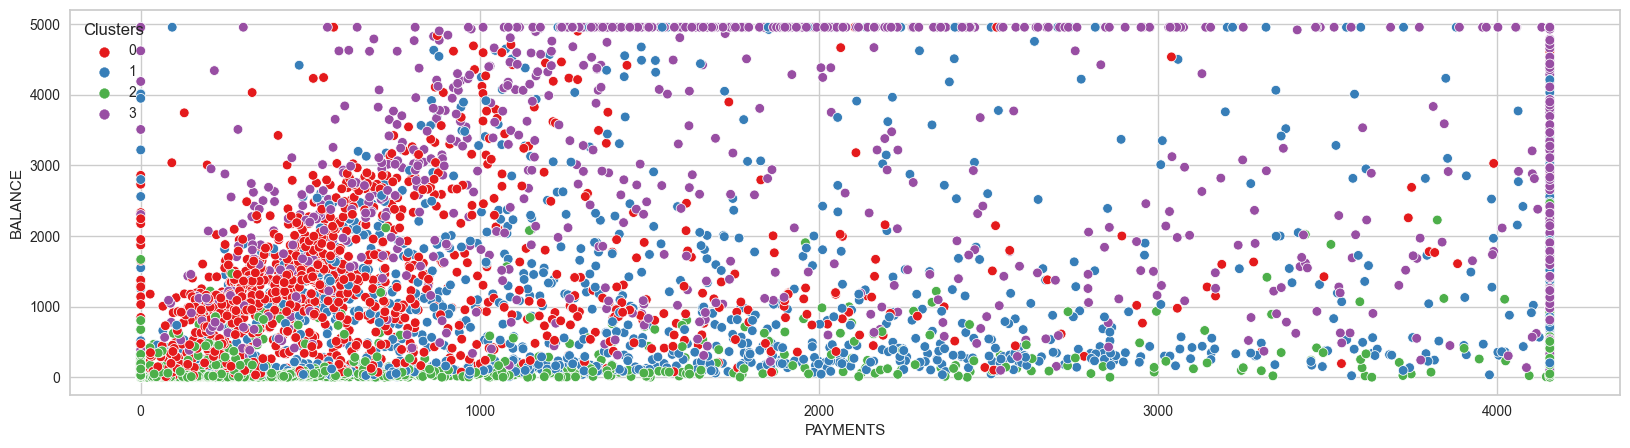

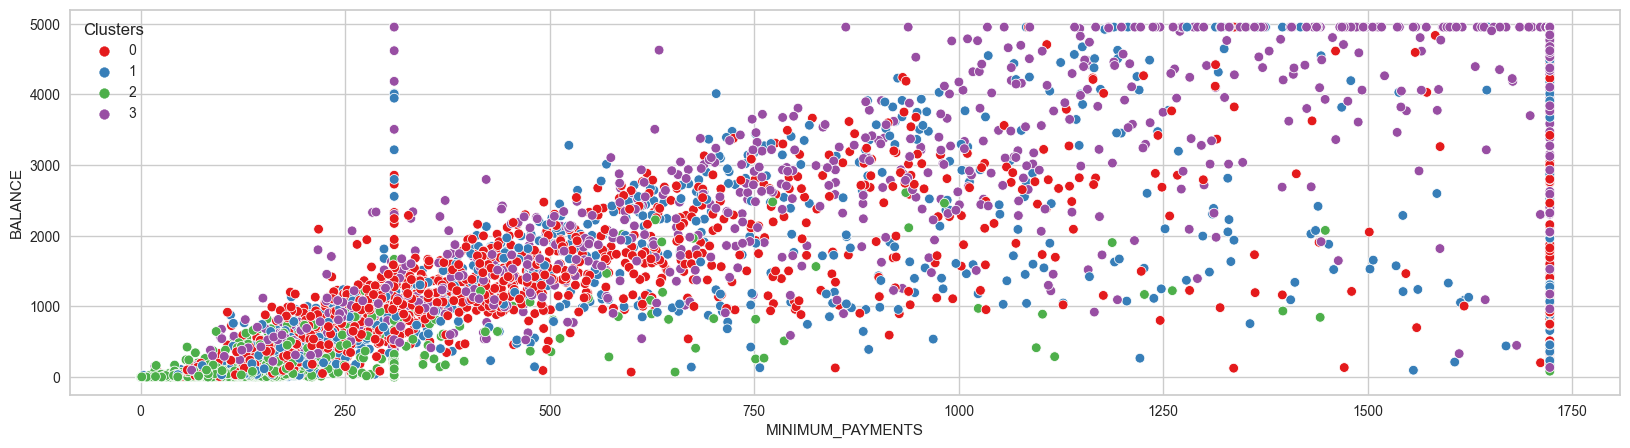

In [34]:
kolom = ['PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for i in kolom:
       plt.figure(figsize=(20,5))
       sns.scatterplot(data=df, x=i, y='BALANCE', hue='Clusters', palette='Set1')

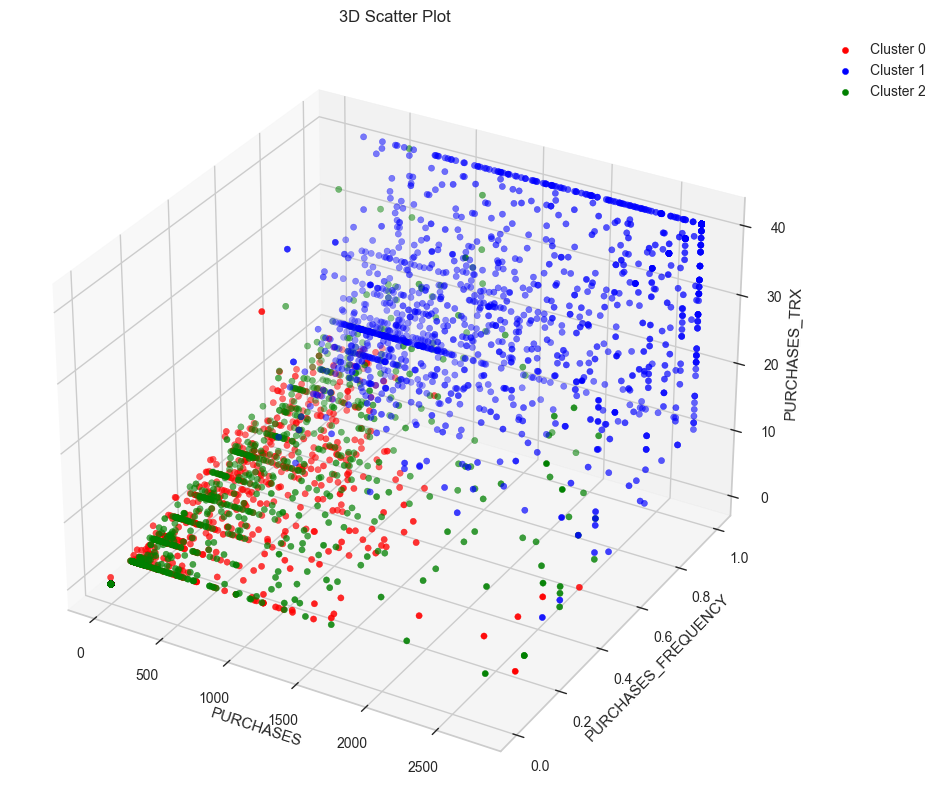

In [35]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}#, 3: 'green', 4: 'orange'}
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}#, 3: 'Cluster 3', 4: 'Cluster 4'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['Clusters'] == cluster_label]
    ax.scatter(cluster_data['PURCHASES'], cluster_data['PURCHASES_FREQUENCY'], cluster_data['PURCHASES_TRX'], c=color, marker='o', label=cluster_names[cluster_label])

ax.set_xlabel('PURCHASES')
ax.set_ylabel('PURCHASES_FREQUENCY')
ax.set_zlabel('PURCHASES_TRX')


plt.title('3D Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

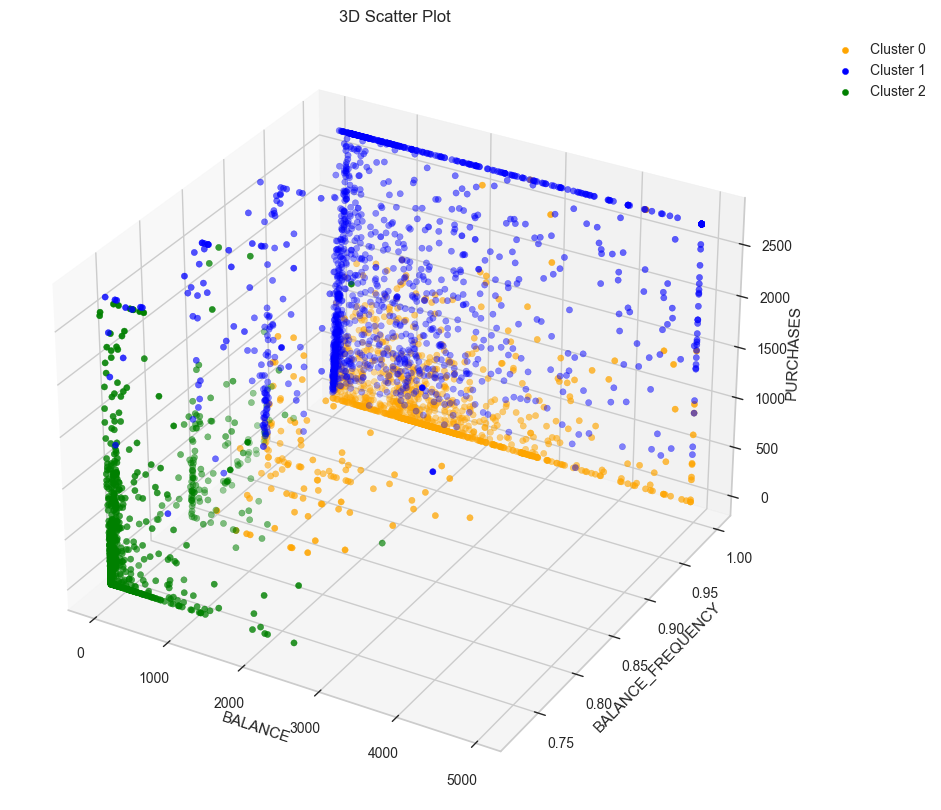

In [36]:
cluster_colors = {0: 'orange', 1: 'blue', 2: 'green'}#, 3: 'green', 4: 'orange'}
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}#, 3: 'Cluster 3', 4: 'Cluster 4'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['Clusters'] == cluster_label]
    ax.scatter(cluster_data['BALANCE'], cluster_data['BALANCE_FREQUENCY'], cluster_data['PURCHASES'], c=color, marker='o', label=cluster_names[cluster_label])

ax.set_xlabel('BALANCE')
ax.set_ylabel('BALANCE_FREQUENCY')
ax.set_zlabel('PURCHASES')


plt.title('3D Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

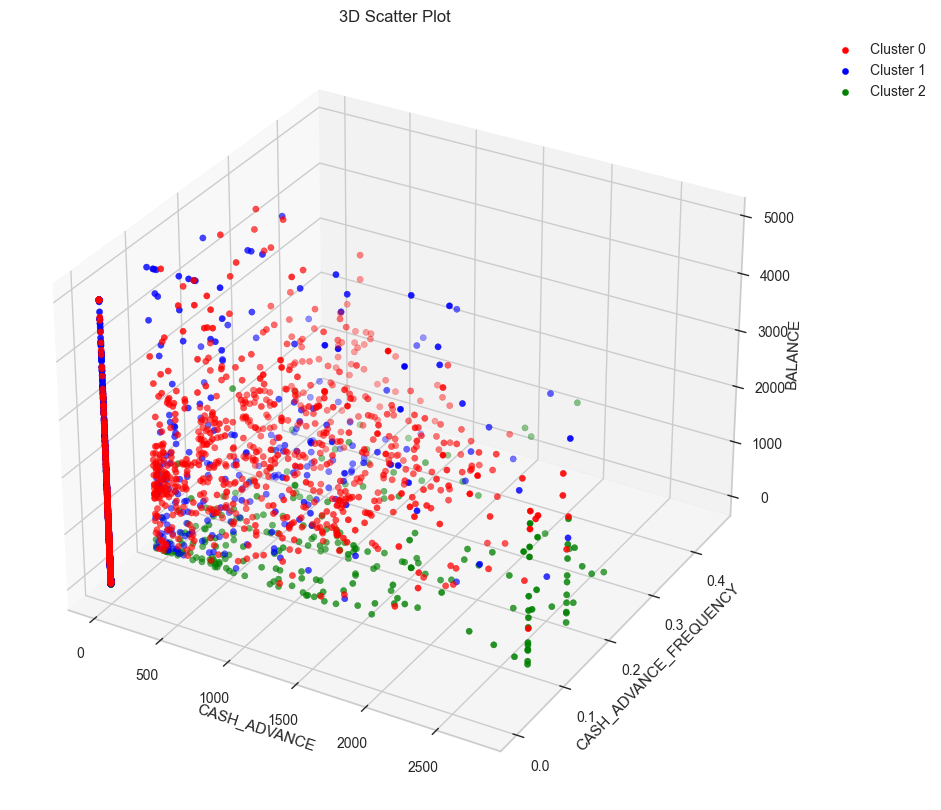

In [37]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}#, 3: 'green', 4: 'orange'}
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}#, 3: 'Cluster 3', 4: 'Cluster 4'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['Clusters'] == cluster_label]
    ax.scatter(cluster_data['CASH_ADVANCE'], cluster_data['CASH_ADVANCE_FREQUENCY'], cluster_data['BALANCE'], c=color, marker='o', label=cluster_names[cluster_label])

ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('BALANCE')


plt.title('3D Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

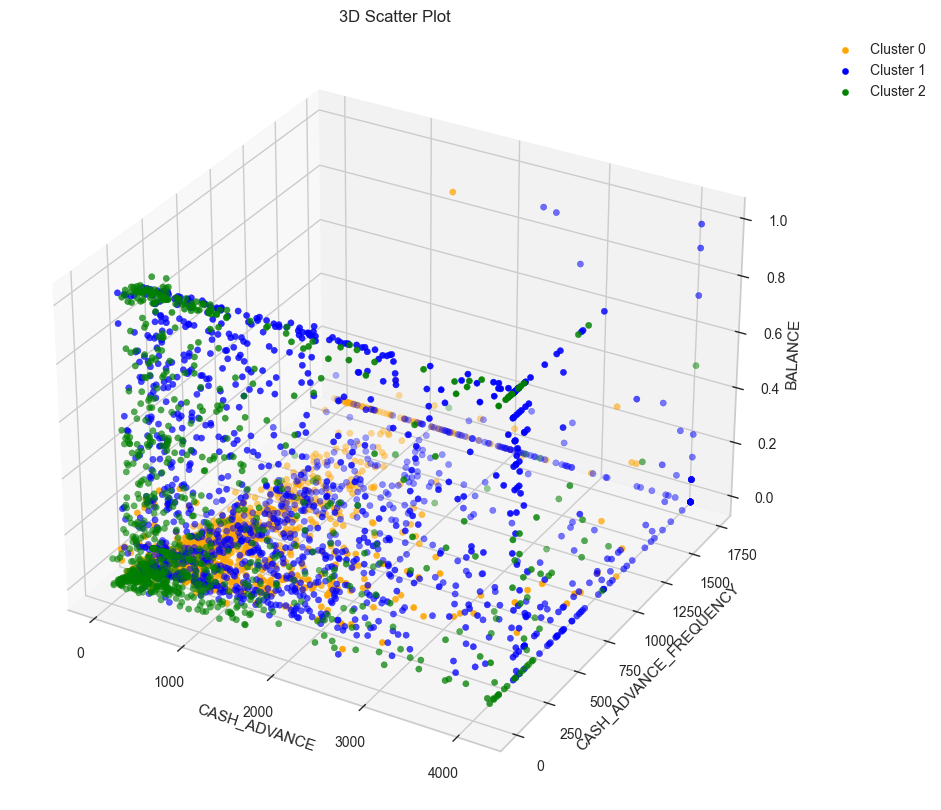

In [38]:
cluster_colors = {0: 'orange', 1: 'blue', 2: 'green'}#, 3: 'green', 4: 'orange'}
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}#, 3: 'Cluster 3', 4: 'Cluster 4'}

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['Clusters'] == cluster_label]
    ax.scatter(cluster_data['PAYMENTS'], cluster_data['MINIMUM_PAYMENTS'], cluster_data['PRC_FULL_PAYMENT'], c=color, marker='o', label=cluster_names[cluster_label])

ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('CASH_ADVANCE_FREQUENCY')
ax.set_zlabel('BALANCE')


plt.title('3D Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

<Axes: xlabel='CREDIT_LIMIT', ylabel='TENURE'>

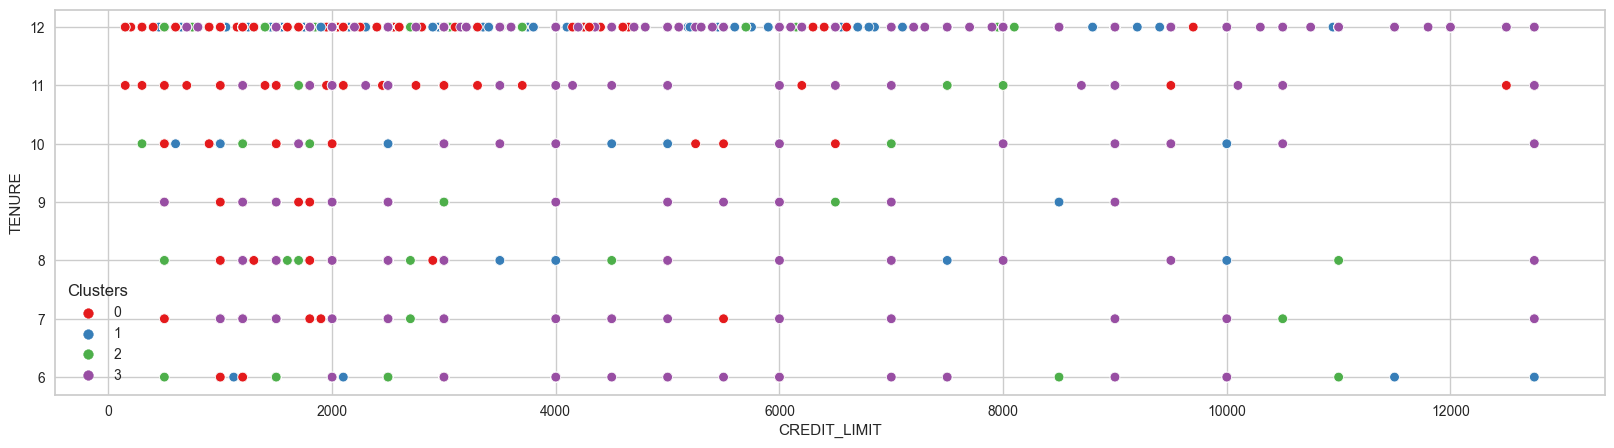

In [39]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='TENURE', hue='Clusters', palette='Set1')

In [40]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE', 'Clusters'],
      dtype='object')

<Figure size 2000x500 with 0 Axes>

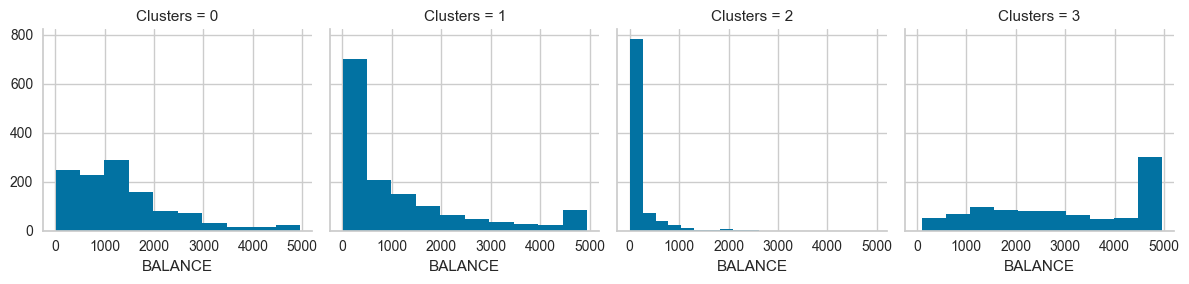

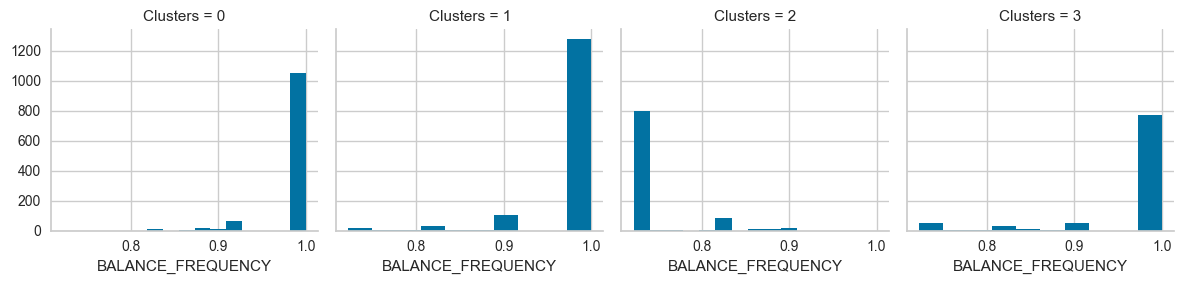

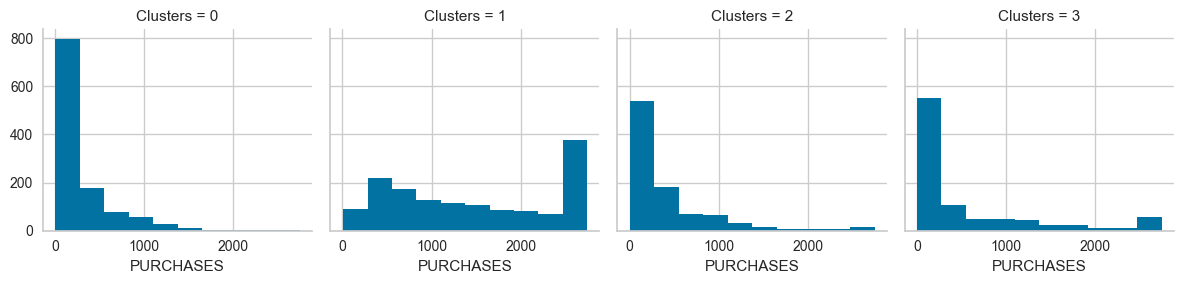

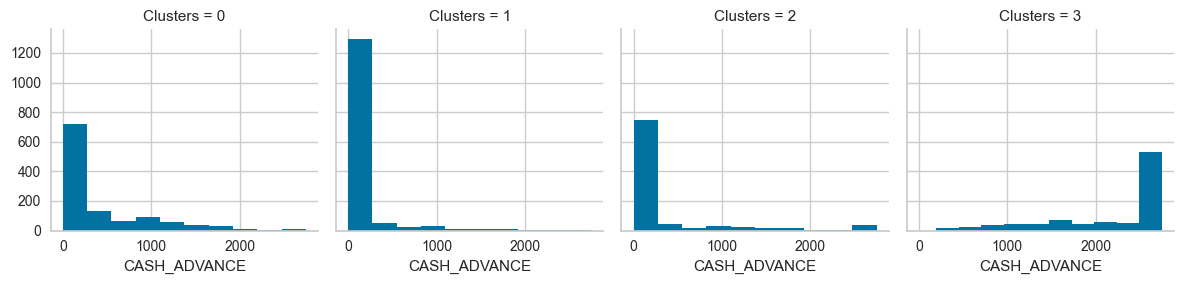

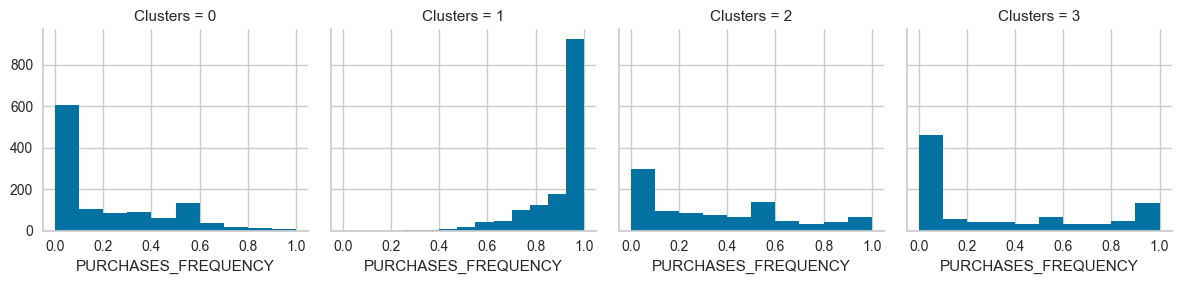

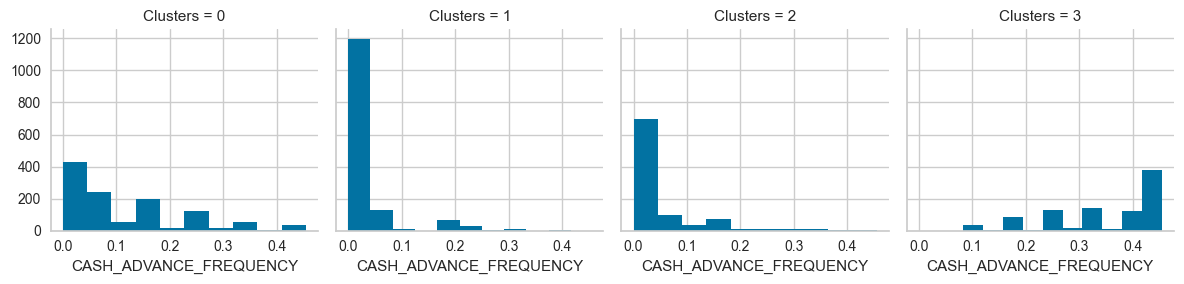

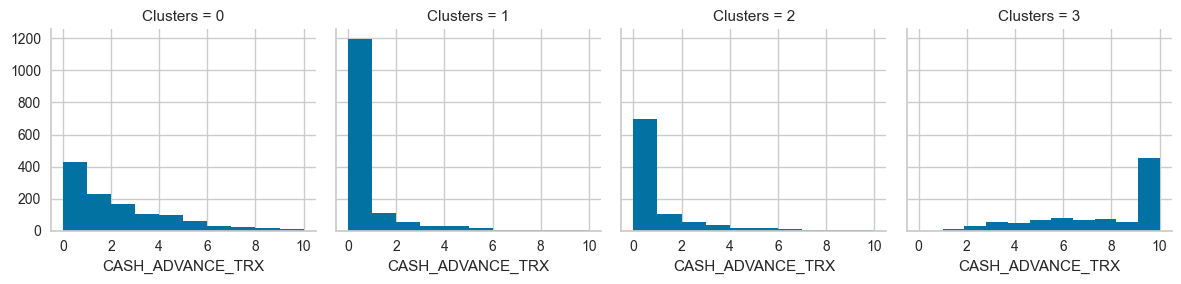

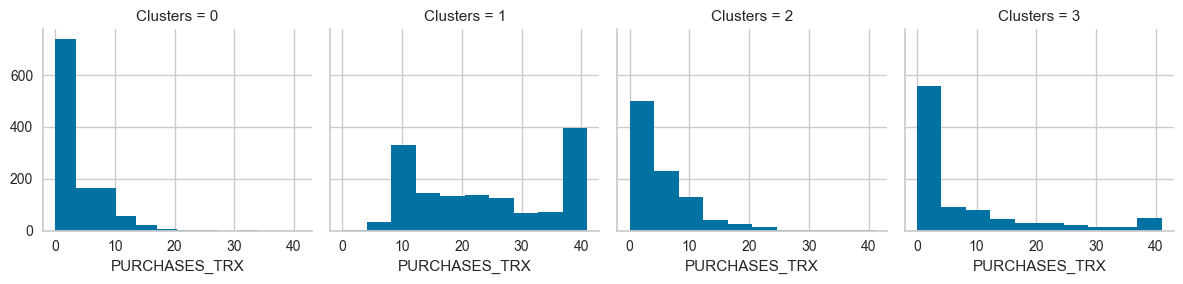

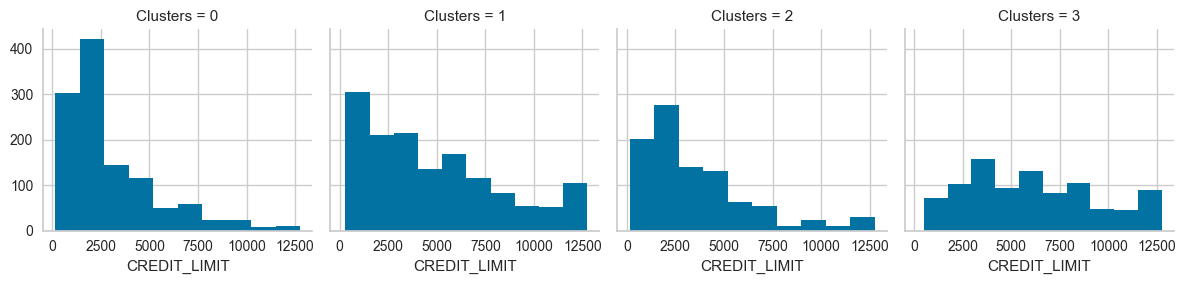

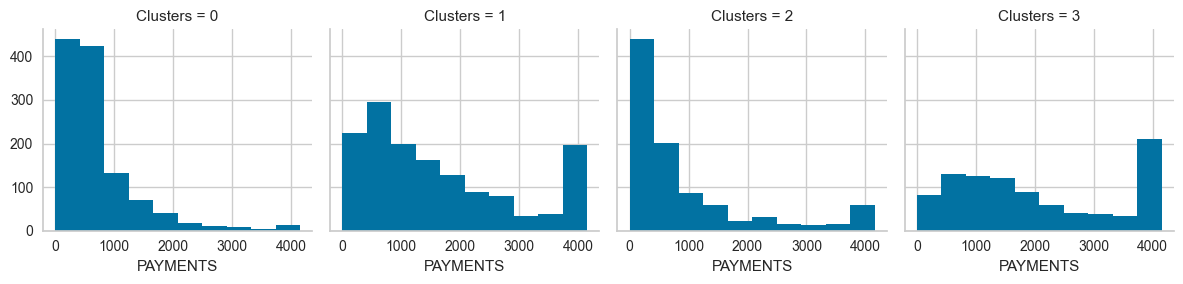

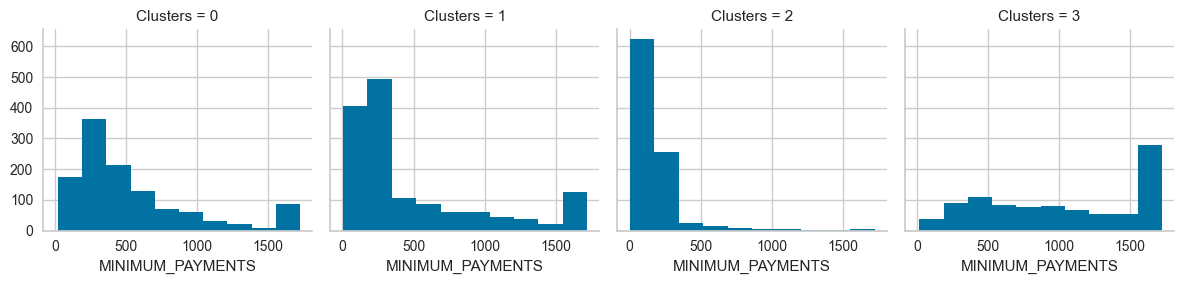

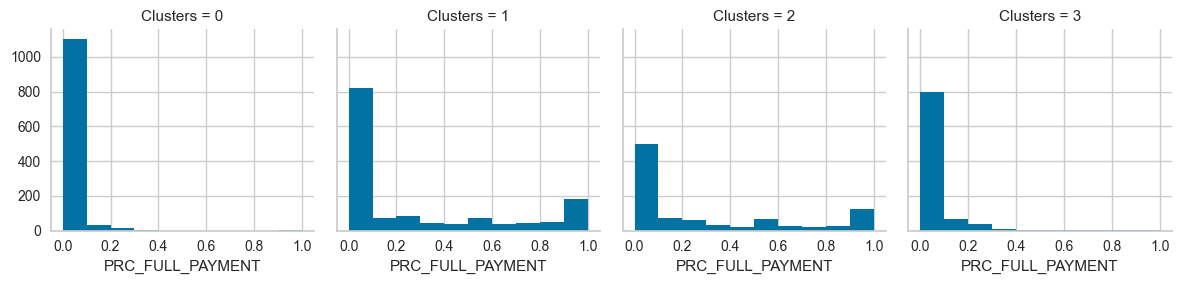

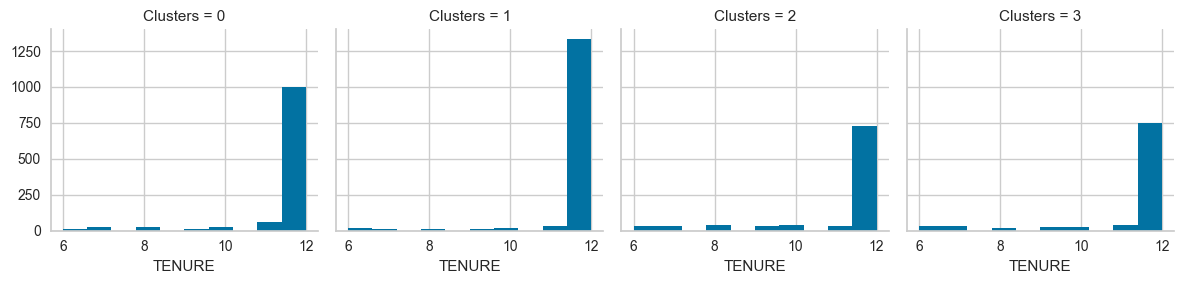

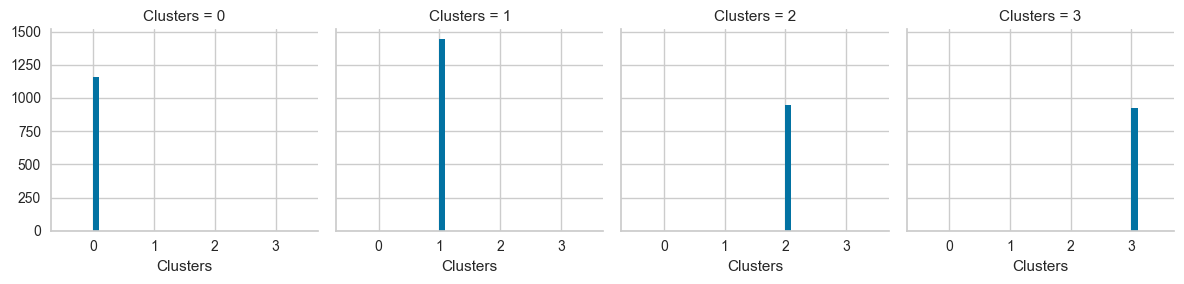

In [41]:
plt.figure(figsize=(20,5))
for i in df:
    grid= sns.FacetGrid(df, col='Clusters')
    grid.map(plt.hist, i) 

In [42]:
df.groupby('Clusters').agg(['mean'])

BALANCE BALANCE_FREQUENCY    PURCHASES CASH_ADVANCE  \
                 mean              mean         mean         mean   
Clusters                                                            
0         1350.068390          0.989991   250.618239   394.076235   
1         1135.158966          0.985145  1496.073535   102.239494   
2          165.429544          0.739449   403.893946   286.901581   
3         3082.209052          0.969816   522.773683  2210.605125   

         PURCHASES_FREQUENCY CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX  \
                        mean                   mean             mean   
Clusters                                                               
0                   0.203573               0.111393         1.840104   
1                   0.923183               0.024156         0.404152   
2                   0.348315               0.037662         0.667373   
3                   0.317838               0.354438         7.843750   

         PURCHASES_TRX CREDIT_LIMIT     PAYMENTS MINIMUM_PAYMENTS  \
                  mean         mean         mean             mean   
Clusters                                                            
0             3.388937  2927.225583   707.851729       542.034765   
1            24.645675  4984.568732  1641.041330       495.083778   
2             5.485169  3511.275895   915.578564       186.403769   
3             7.571121  6125.000000  2063.917669      1036.585993   

         PRC_FULL_PAYMENT     TENURE  
                     mean       mean  
Clusters                              
0                0.014223  11.618842  
1                0.271147  11.759170  
2                0.270293  11.209746  
3                0.043184  11.328664

# ix - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [43]:
# Save the Files

joblib.dump(sc, "scale.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(km, "kmeans.pkl")

['kmeans.pkl']

# x - Model Inference
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [44]:
inf_sc = joblib.load("scale.pkl")
inf_pca = joblib.load("pca.pkl")
inf_km = joblib.load("kmeans.pkl")

In [45]:
new_data = pd.DataFrame({
    'BALANCE': [1000], 
    'BALANCE_FREQUENCY': [1], 
    'PURCHASES': [500], 
    'CASH_ADVANCE': [1000], 
    'PURCHASES_FREQUENCY': [1],
    'CASH_ADVANCE_FREQUENCY': [0.5], 
    'CASH_ADVANCE_TRX': [5], 
    'PURCHASES_TRX': [5],
    'CREDIT_LIMIT': [5000], 
    'PAYMENTS': [1000], 
    'MINIMUM_PAYMENTS': [1000], 
    'PRC_FULL_PAYMENT': [0],
    'TENURE': [1]
})
new_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0     1000                  1        500          1000                    1   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.5                 5              5          5000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      1000              1000                 0       1

## Scaling Data

In [46]:
inf_sc.fit(new_data)
new_sc=inf_sc.transform(new_data)

In [47]:
new_sc.shape

(1, 13)

## PCA

In [48]:
new_sc_pca = inf_pca.transform(new_sc)

In [49]:
inf_pca.explained_variance_ratio_

array([0.33816151, 0.25603838, 0.1096831 , 0.07730398, 0.05273282,
       0.03985727, 0.03147171, 0.02998458])

In [50]:
pred = km.predict(new_sc_pca)
print("Data tersebut termasuk pada cluster: {}".format (pred))

Data tersebut termasuk pada cluster: [2]


# xi - Pengambilan Kesimpulan
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa:
    - Dataset ini sangat acak, datanya pun banyak yang nilainya rendah dan relatif berhimpitan 
    
2. Berdasarkan Model Evaluation:
    - Berdasarkan metode Elbow dan Silhouette, didapatkan jumlah cluster sebanyak 4

3. Penjelasan cluster:
    - Cluster 0 : Nasabah dengan rata-rata saldo $1350 yang melakukan transaksi rata-rata $250, memilki credit limit rata-rata $2927 yang sering melakukan pembayaran dengan rata-rata $707
    - Cluster 1 : Nasabah dengan rata-rata saldo $1135 yang melakukan transaksi rata-rata $1496, memilki credit limit rata-rata $4984 yang sering melakukan pembayaran dengan rata-rata $1641, nasabah jenis ini sering melakukan transaksi dibandingkan yang lainnya
    - Cluster 2 : Nasabah dengan rata-rata saldo $165 yang melakukan transaksi rata-rata $404, memilki credit limit rata-rata $3511 yang sering melakukan pembayaran dengan rata-rata $915
    - Cluster 3 : Nasabah dengan rata-rata saldo $3082 yang melakukan transaksi rata-rata $523, memilki credit limit rata-rata $6125 yang sering melakukan pembayaran dengan rata-rata $2063

Conceptual Problems

> Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?
- Inersia dalam konteks K-Means adalah jarak antara setiap titik dari pusat clusternya. Semakin rendah nilai inersia dan nilai K lebih baik, untuk menentukan nilai K yang baik dapat menggunakan Elbow Method.

> Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
- Elbow Method adalah metode untuk untuk menentukan nilai k yang optimal untuk melakukan clustering dengan cara melihat titik yang tiba-tiba membuat grafiknya tidak melengkung sempurna, dititik tersebut yang diambil sebagai nilai K. Kelebihannya adalah mudah untuk dilihat dan diinterpretasi nilainya, sedangkan kelemahannya adalah karena sangat subjektif, pendapat orang yang melihat grafiknya bisa berbeda.

